In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

from plotting import plot_utils, summary_plots, load_fits, plot_prf_params, pycortex_plot_utils
plot_utils.set_all_font_sizes(20)
from utils import roi_utils, default_paths, stats_utils, nsd_utils

In [2]:
# Load results of the fitting procedure

subjects = np.arange(1,9)
# subjects=[1]
n_subjects = len(subjects)

fitting_types = ['semantic_indoor_outdoor', \
                 'semantic_animacy', \
                 'semantic_real_world_size', 
                 'semantic_highlevel_concat']

n_models = len(fitting_types)

outlist = []
for fi in range(n_models):
        
    out = [load_fits.load_fit_results(subject=ss, fitting_type=fitting_types[fi], \
                                      n_from_end=0, verbose=False) \
                                       for ss in subjects]
    outlist.append(out)
out = outlist

fig_save_folder=None


In [3]:
# initialize roi_def objects to get roi indices
roi_def = roi_utils.multi_subject_roi_def(subjects)
roi_names =roi_def.roi_names
n_rois = roi_def.n_rois

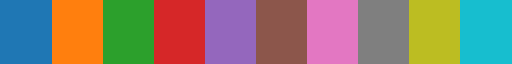

In [13]:
cm.tab10

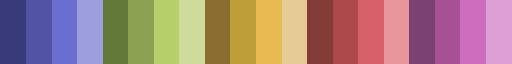

In [16]:
cm.tab20b

In [11]:
cm.tab10(np.linspace(0,1,10))[[4, 3, 9],:]

array([[0.58039216, 0.40392157, 0.74117647, 1.        ],
       [0.83921569, 0.15294118, 0.15686275, 1.        ],
       [0.09019608, 0.74509804, 0.81176471, 1.        ]])

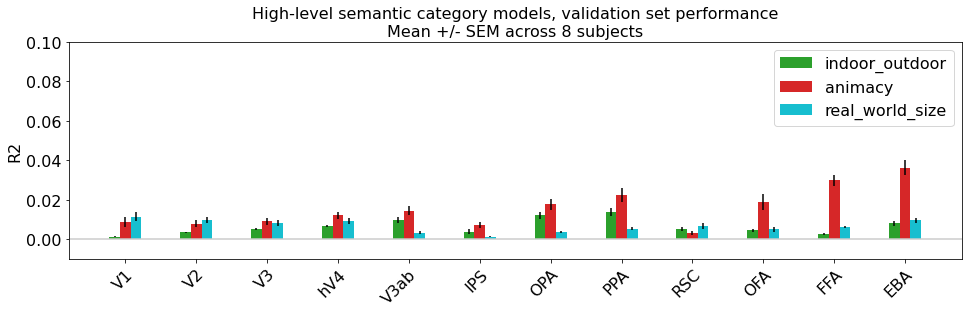

In [19]:
# plot mean performance each ROI

n_rois = roi_def.n_rois

nc_thresh = 0.01

fi2plot = [0,1,2]

# model_colors = cm.tab10(np.linspace(0,1,10))[[4, 3, 9],:]
model_colors = cm.tab10(np.linspace(0,1,10))[[2, 3, 9],:]
# model_colors = cm.GnBu(np.linspace(0,1,4))[1:,:]
# model_colors = cm.tab10(np.linspace(0,1,4))[[0,1,3],:]
roi_mean_vals = np.zeros((n_rois, len(fi2plot), n_subjects))

for si in range(n_subjects):

    for fi, ff in enumerate(fi2plot):

        vals = out[ff][si]['val_r2'][:,0]
        nc = nsd_utils.ncsnr_to_nc(out[fi][si]['voxel_ncsnr'][out[fi][si]['voxel_mask']])/100
        inds2use = nc>nc_thresh
    
        for ri in range(n_rois):

            inds_this_roi = roi_def.ss_roi_defs[si].get_indices(ri) & inds2use

            roi_mean_vals[ri,fi,si] = np.mean(vals[inds_this_roi])

mean_vals = np.mean(roi_mean_vals, axis=2)
sem_vals = np.std(roi_mean_vals, axis=2)/np.sqrt(n_subjects)
  
legend_separate=True
title='High-level semantic category models, validation set performance\nMean +/- SEM across 8 subjects'

# title = 'Performance of high-level semantic category models\n(avg +/- SEM over subjects)\n%s'\
#     %summary_plots.get_substr(out[0])
names = [fitting_types[fi].split('semantic_')[1] for fi in fi2plot]

plot_utils.set_all_font_sizes(16)

plt.rcParams['pdf.fonttype']=42
bw = 0.15;
space = (1 - (bw*mean_vals.shape[1]))/2
fh = plot_utils.plot_multi_bars(mean_data=mean_vals, err_data=sem_vals, colors=model_colors, \
                                space=space, \
                xticklabels=roi_names, ylabel='R2', \
                ylim=[-0.01, 0.10], title=title, horizontal_line_pos=0,\
                legend_labels=names, \
                legend_overlaid=True, legend_separate=False, \
                fig_size=(16,4))

fn2save = '/user_data/mmhender/imStat/figures/High_level_semantic_R2.pdf'
plt.savefig(fn2save)

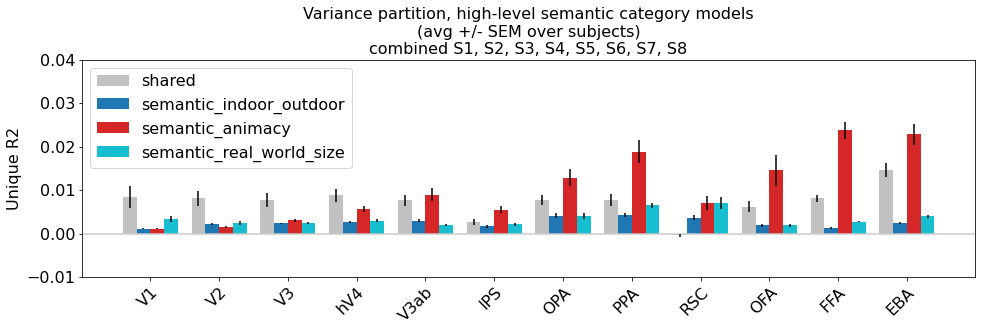

In [13]:
# plot variance partition from concatenated model

fi = 3;

nc_thresh = 0.01

n_rois = roi_def.n_rois
roi_mean_vals = np.zeros((n_rois, 4, n_subjects))

ve_colors = np.concatenate([0.6*np.ones((1,4)), cm.tab10(np.linspace(0,1,4))[[0,1,3],:]], axis=0)

ve_names = ['shared']+[out[fi][0]['partial_version_names'][ii].split('leave_out_')[1] \
                for ii in np.arange(1,4)]

for si in range(n_subjects):

    nc = nsd_utils.ncsnr_to_nc(out[fi][si]['voxel_ncsnr'][out[fi][si]['voxel_mask']])/100
    inds2use = nc>nc_thresh
        
    val_r2 = out[fi][si]['val_r2']

    var_expl = val_r2[:,0:1] - val_r2[:,1:]

    vals = np.concatenate([val_r2[:,0:1] - np.sum(var_expl, axis=1, keepdims=True), var_expl], axis=1)

    for ri in range(n_rois):

        inds_this_roi = roi_def.ss_roi_defs[si].get_indices(ri) & inds2use

        roi_mean_vals[ri,:,si] = np.mean(vals[inds_this_roi], axis=0)

mean_vals = np.mean(roi_mean_vals, axis=2)
sem_vals = np.std(roi_mean_vals, axis=2)/np.sqrt(n_subjects)
  
legend_separate=True
title = 'Variance partition, high-level semantic category models\n(avg +/- SEM over subjects)\n%s'\
    %summary_plots.get_substr(out[0])

plot_utils.set_all_font_sizes(16)

fh = plot_utils.plot_multi_bars(mean_data=mean_vals, err_data=sem_vals, colors=ve_colors, space=0.1, \
                xticklabels=roi_names, ylabel='Unique R2', \
                ylim=[-0.01, 0.04], title=title, horizontal_line_pos=0,\
                legend_labels=ve_names, \
                legend_overlaid=True, legend_separate=False, \
                fig_size=(16,4))

    

/user_data/mmhender/imStat/code/plotting/summary_plots.py:76: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.xscale('log');
/user_data/mmhender/imStat/code/plotting/summary_plots.py:76: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.xscale('log');
/user_data/mmhender/imStat/code/plotting/summary_plots.py:76: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.xscale('log');
/user_data/mmhender/imStat/code/plotting/summary_plots.py:76: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.xscale('log');
/user_data/mmhender/imStat/code/plotting/summary_plots.py:76: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.xscale('log');


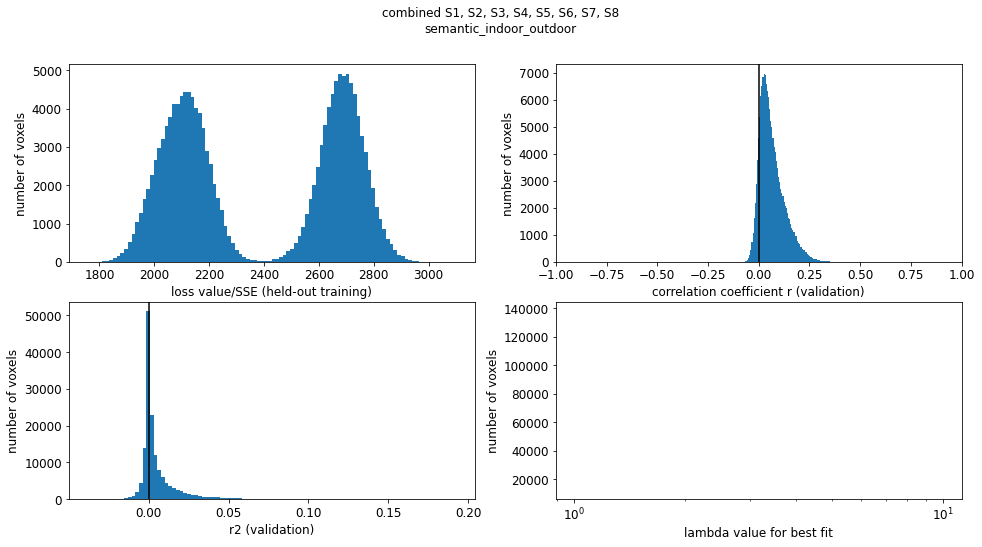

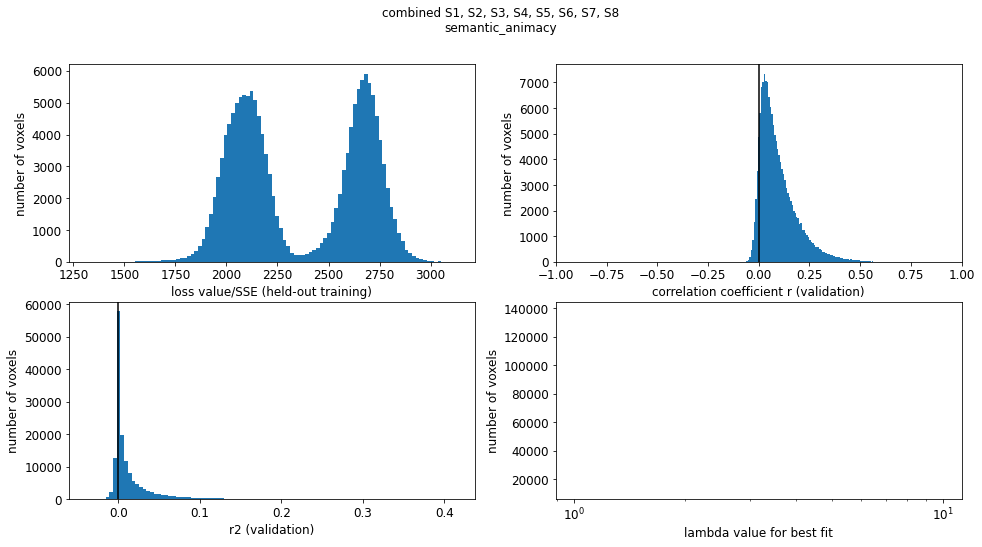

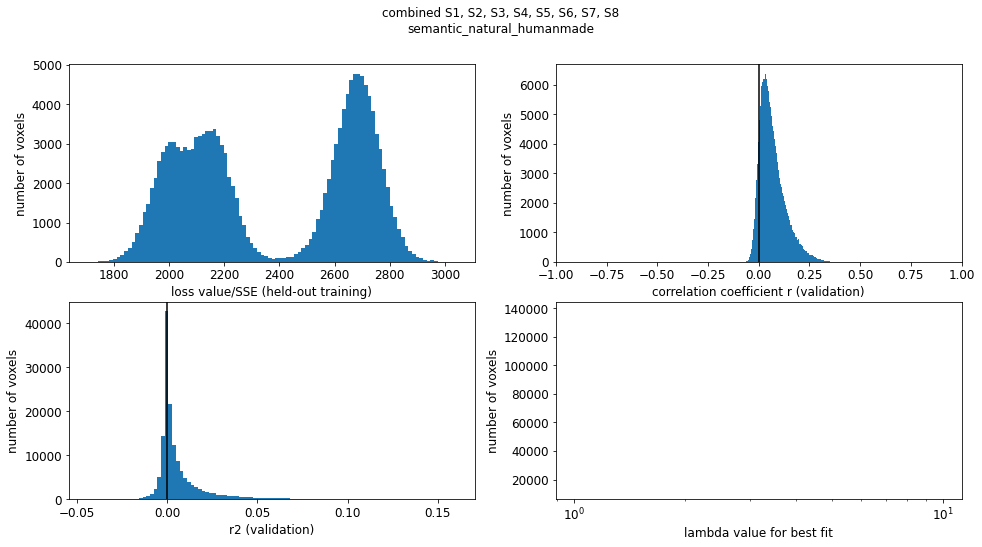

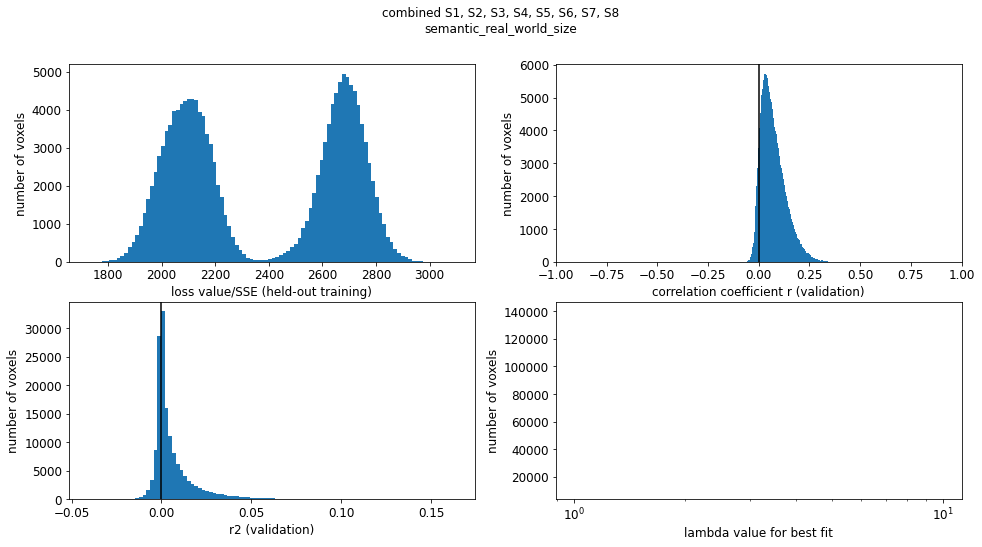

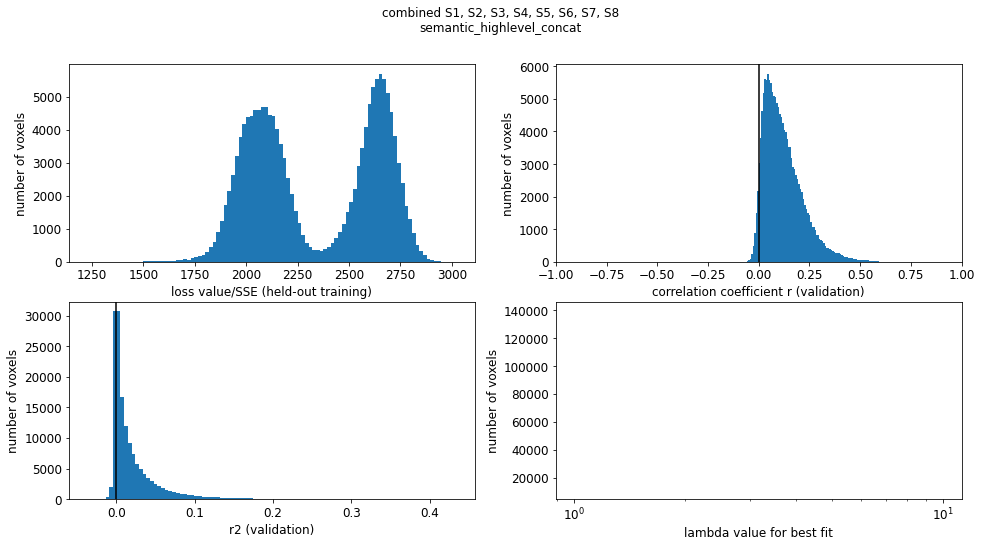

In [46]:
plot_utils.set_all_font_sizes(fs = 12)
for fi, fitting_type in enumerate(fitting_types):
    summary_plots.plot_perf_summary(fitting_type, out[fi], fig_save_folder=fig_save_folder)

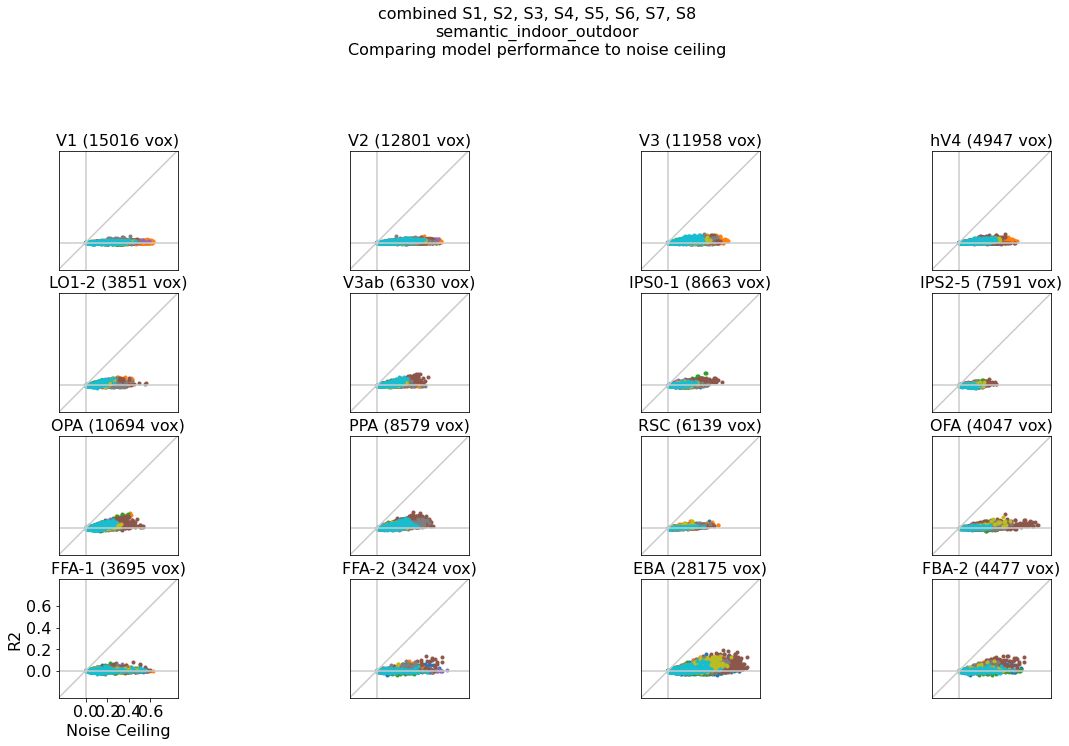

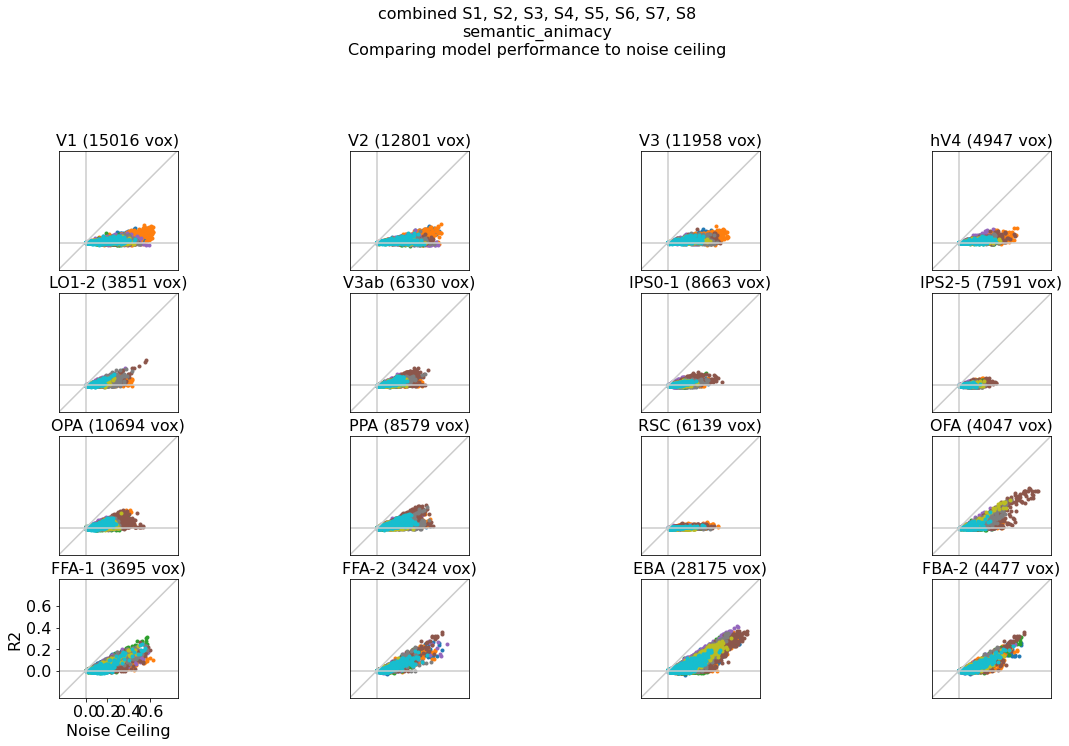

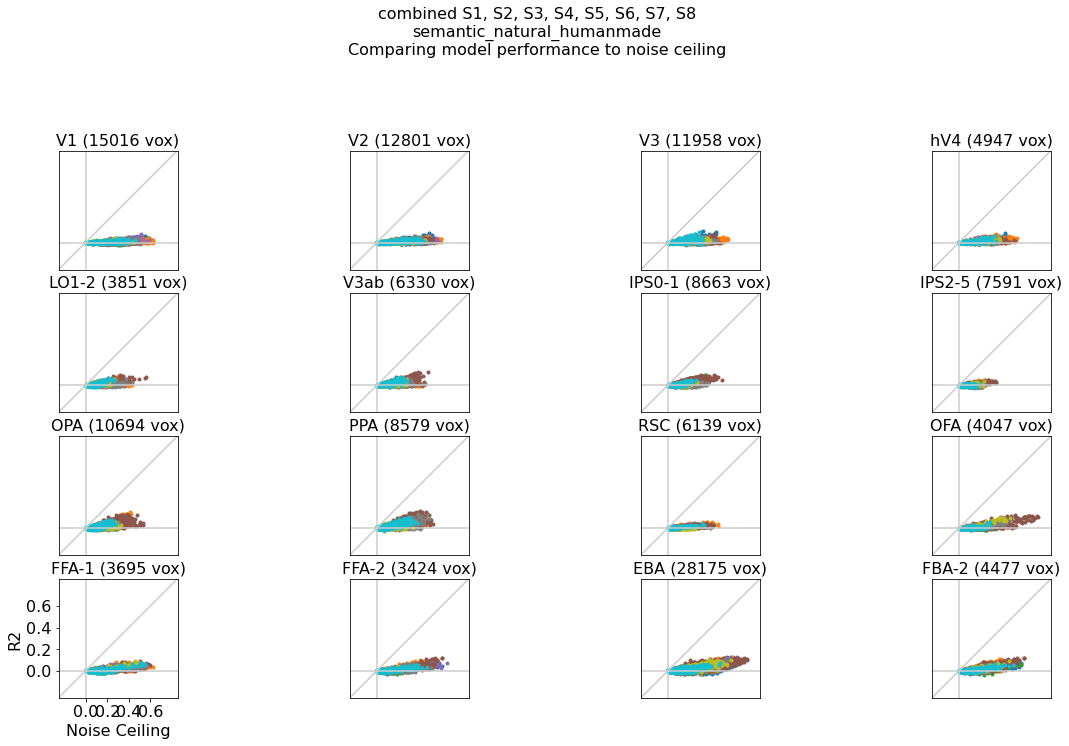

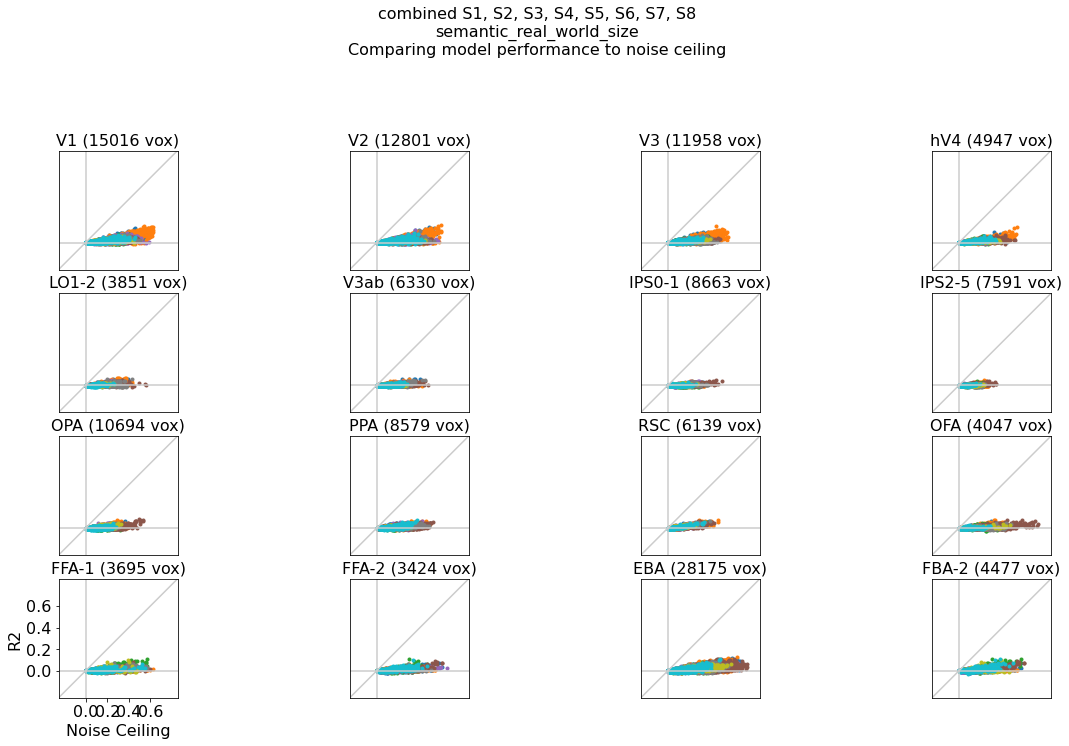

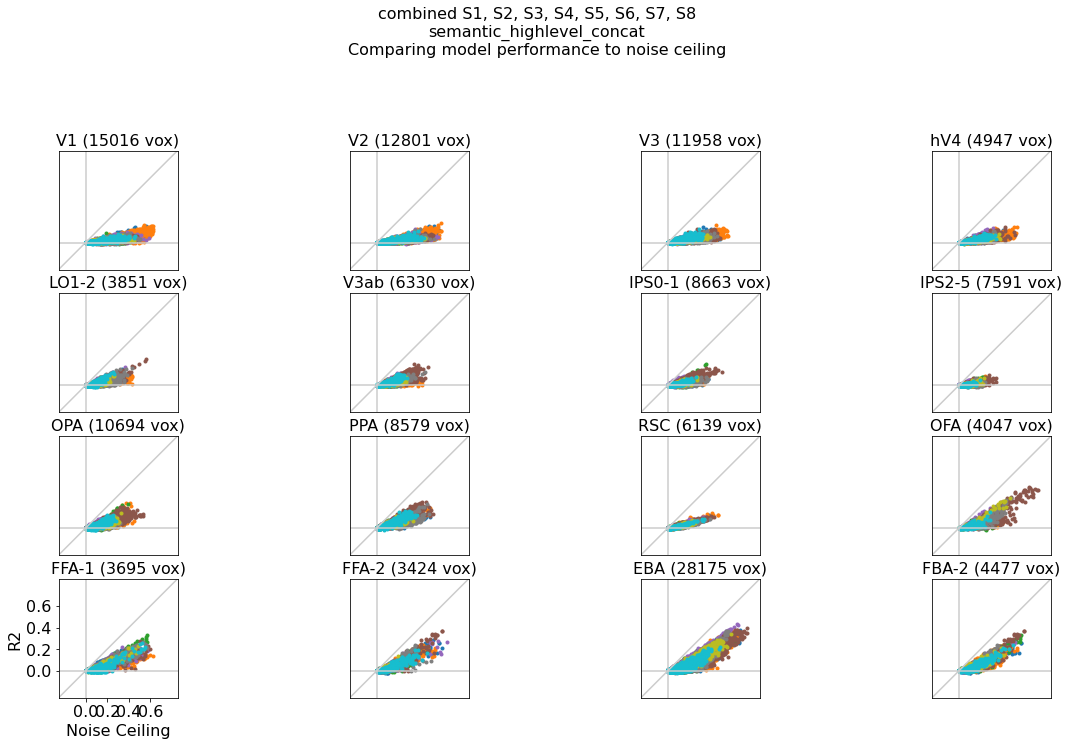

In [47]:
plot_utils.set_all_font_sizes(fs = 16)
colors = cm.tab10(np.linspace(0,1,n_subjects))
for fi, fitting_type in enumerate(fitting_types):
    summary_plots.plot_r2_vs_nc(fitting_type,outlist[fi], roi_def=roi_def,\
                                axlims = [-0.25, 0.85], fig_save_folder=fig_save_folder, \
                                fig_size=(20,20), sub_colors=colors)

In [14]:
import cortex
from utils import numpy_utils

port=44442

title = 'High-level semantic models, %s'%(summary_plots.get_substr(out[0]));

names = []
maps = []
cmaps = []
mins = []
maxes = []
vox2plot = []
subject_map_inds = []
map_sequence = []

for si, ss in enumerate(subjects):
    
    for fi, fitting_type in enumerate(fitting_types):

        names += ['S%d: %s (sqrt R2)'%(ss,fitting_type.split('semantic_')[1])]
        maps += [np.sqrt(out[fi][si]['val_r2'][:,0])]
        cmaps += ['PuBu']
        mins += [0]
        maxes += [0.40]

    n_voxels = out[0][si]['val_r2'].shape[0]
    vox2plot.append(np.ones((n_voxels,))==1)
    
    n_new_maps = int(len(names)/(si+1))
    subject_map_inds += [si for ii in range(n_new_maps)]
    map_sequence += [ni for ni in range(n_new_maps)]
    
# putting them into a nicer order (want same type of map near each other to compare subs)
_, new_order = numpy_utils.double_sort(np.arange(len(maps)), map_sequence, subject_map_inds)
names = [names[ni] for ni in new_order]
cmaps = [cmaps[ni] for ni in new_order]
mins = [mins[ni] for ni in new_order]
maxes = [maxes[ni] for ni in new_order]
maps = [maps[ni] for ni in new_order]
subject_map_inds = [subject_map_inds[ni] for ni in new_order]


voxel_mask = [o['voxel_mask'] for o in out[0]]
nii_shape = [o['brain_nii_shape'] for o in out[0]]
volume_space = out[0][0]['volume_space']

viewer = pycortex_plot_utils.plot_maps_pycortex(subjects, port, maps, names, subject_map_inds=subject_map_inds, \
                        mins=mins, maxes=maxes, cmaps=cmaps, \
                        title=title, vox2plot = vox2plot, roi_def=roi_def, simplest_roi_maps=True, \
                        voxel_mask =voxel_mask, \
                        nii_shape = nii_shape, \
                        volume_space=volume_space)

/home/mmhender/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in sqrt


navigate browser to: 127.0.0.1:44442
Started server on port 44442


Exception in thread Thread-5:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/threading.py", line 917, in _bootstrap_inner
    self.run()
  File "/home/mmhender/myenv/lib/python3.7/site-packages/cortex/webgl/serve.py", line 288, in run
    self.server.listen(self.port)
  File "/home/mmhender/myenv/lib/python3.7/site-packages/tornado/tcpserver.py", line 151, in listen
    sockets = bind_sockets(port, address=address)
  File "/home/mmhender/myenv/lib/python3.7/site-packages/tornado/netutil.py", line 161, in bind_sockets
    sock.bind(sockaddr)
OSError: [Errno 98] Address already in use



KeyboardInterrupt: 